# Assignment 5: Pandas Fundamentals with Earthquake Data

#### Aandishah Samara
#### 11$^{th}$ October 2022 
#### Research Computing for Environmental Science 
#### Professor Crone

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1) Use Pandas’ read_csv function directly on this URL to open it as a DataFrame
(Don’t use any special options). Display the first few rows and the DataFrame info.
You should have seen that the dates were not automatically parsed into datetime types.

In [2]:
df = pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv")
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


## 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index
Verify that this worked using the head and info functions.

In [3]:
df = pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv",
                 parse_dates=[0])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  id         120108 non-null  object        
 12  updated    120108 non-null  object        
 13  place      120108 non-null  object        
 14  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(6)
memory usage: 13.7+ MB


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [4]:
df = df.set_index('id')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


## 3) Use describe to get the basic statistics of all the columns
Note the highest and lowest magnitude of earthquakes in the databse.

In [5]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


In [6]:
max_eq = df.mag.max()
print("Largest Earthquake Magnitude =", max_eq)
min_eq = df.mag.min()
print("Smallest Earthquake Magnitude =", min_eq)

Largest Earthquake Magnitude = 8.2
Smallest Earthquake Magnitude = -0.97


## 4) Use nlargest to get the top 20 earthquakes by magnitude¶
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

Examine the structure of the place column. The state / country information seems to be in there. How would you get it out?

In [7]:
n20 = df.mag.nlargest(20)
n20

id
usc000nzvd    8.2
usc000rki5    7.9
usc000p27i    7.7
usc000phx5    7.6
usb000pr89    7.5
usc000piqj    7.4
usb000slwn    7.3
usb000pq41    7.2
usc000pft9    7.1
usc000sxh8    7.1
usc000stdc    7.1
usb000sk6k    7.0
usc000mnvj    6.9
usc000nzwm    6.9
usb000r2hc    6.9
usc000rngj    6.9
usc000rkg5    6.9
usb000ruzk    6.9
usc000rr6a    6.9
usb000rzki    6.9
Name: mag, dtype: float64

## 5) Extract the state or country using Pandas text data functions
Add it as a new column to the dataframe called country. Note that some of the “countries” are actually U.S. states.

In [8]:
#df['Country/State'] = df.place.str.split(",", expand=True).str.get(1).expand = False
df['country']  = df.place.str.strip().str.split(',', expand = True, n = 1)[1]
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake,Alaska
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake,Alaska
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake,California


## 6) Display each unique value from the new column
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [9]:
unique = df.country.unique()
unique

array([' Alaska', ' Nevada', ' Mexico', ' California',
       ' Papua New Guinea', ' New Zealand', ' Missouri', None, ' Montana',
       ' British Virgin Islands', ' Washington', ' Oregon', ' Canada',
       ' Fiji', ' Antarctica', ' Chile', ' Utah', ' Indonesia',
       ' Solomon Islands', ' Micronesia', ' Oklahoma', ' Hawaii',
       ' Wyoming', ' Russia', ' Arizona', ' Philippines', ' Bolivia',
       ' Greece', ' Japan', ' Puerto Rico', ' Iran', ' Tonga',
       ' Wallis and Futuna', ' Colorado', ' Guam', ' CA', ' Idaho',
       ' Pakistan', ' Burma', ' China', ' Peru', ' Costa Rica',
       ' East Timor', ' Japan region', ' Northern Mariana Islands',
       ' El Salvador', ' Samoa', ' Taiwan', ' Arkansas',
       ' South Sandwich Islands', ' Colombia', ' Dominican Republic',
       ' Argentina', ' Texas', ' New Hampshire', ' Saint Helena',
       ' Tanzania', ' Vanuatu', ' Bosnia and Herzegovina', ' India',
       ' American Samoa', ' Tennessee', ' Kentucky', ' Serbia',
       ' N

## 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger

In [10]:
mag_4 = df[df['mag'] > 4]
mag_4

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,None
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usc000t6yh,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,2015-02-24T00:35:14.040Z,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
usc000t6y2,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,2015-02-24T00:35:14.040Z,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
usc000t6y1,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,2015-02-24T00:35:14.040Z,"37km ESE of Santiago, Philippines",earthquake,Philippines


## 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes
Location name on the x axis, Earthquake count on the y axis

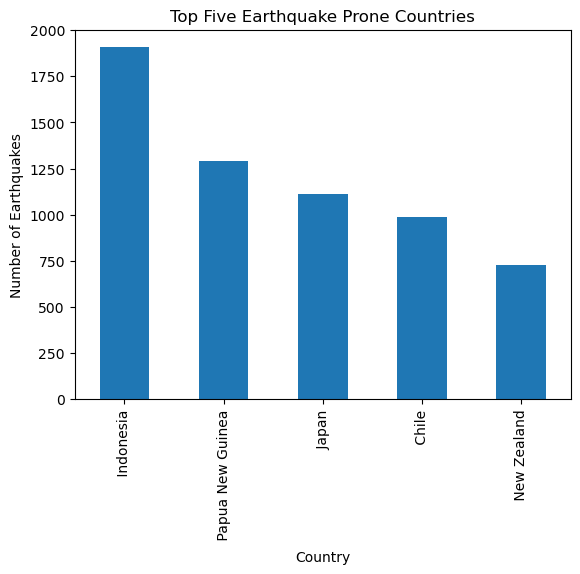

In [11]:
#counts = df.groupby(["country"]).size().rename("Count")
#count = df.groupby(["country"]).size().rename("Count")
count_5 = mag_4['country'].value_counts()[:5]
count_5.plot(kind = 'bar', xlabel = 'Country', ylabel = 'Number of Earthquakes', title = 'Top Five Earthquake Prone Countries')
plt.show()

## 9) Make a histogram the distribution of the Earthquake magnitudes
https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset. Use a Logarithmic scale. What sort of relationship do you see?


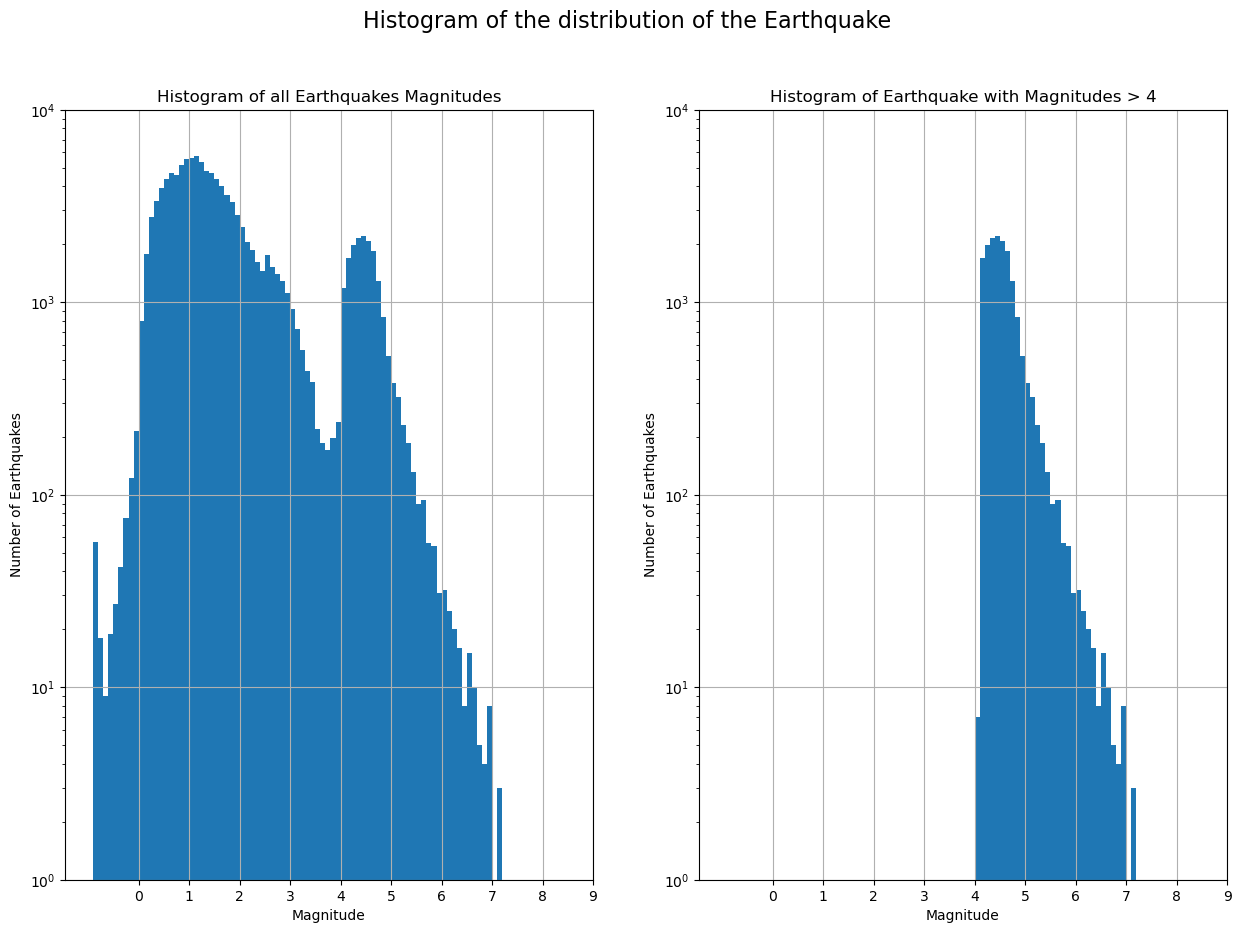

In [12]:
fig, ax = plt.subplots(ncols = 2, figsize = [15,10])
xtick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#ytick = [0, 10^0, 10^1, 10^2, 10^3, 10^4, 10^5]
df['mag'].hist(ax=ax[0], log = 'TRUE', bins = np.arange(-1, 8.4, 0.1))
mag_4['mag'].hist(ax=ax[1], log = 'TRUE', bins = np.arange(-1, 8.4, 0.1))
ax[0].set_xlabel("Magnitude")
ax[0].set_ylabel("Number of Earthquakes")
ax[0].set_xticks(xtick)
ax[0].set_ylim([1e0, 1e4])
#ax[0].set_yticks(ytick) 
ax[0].set_title("Histogram of all Earthquakes Magnitudes")
ax[1].set_title("Histogram of Earthquake with Magnitudes > 4")
ax[1].set_ylabel("Number of Earthquakes")
ax[1].set_ylim([1e0, 1e4])
ax[1].set_xticks(xtick)
#ax[1].set_yticks(ytick) 
ax[1].set_xlabel("Magnitude")
#ax[0].xticks()
fig.suptitle('Histogram of the distribution of the Earthquake', fontsize = 16)
plt.show()

## 10) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude
Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty.
What difference do you note between the filtered and unfiltered datasets?

In [13]:
mag_4

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,None
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usc000t6yh,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,2015-02-24T00:35:14.040Z,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
usc000t6y2,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,2015-02-24T00:35:14.040Z,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
usc000t6y1,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,2015-02-24T00:35:14.040Z,"37km ESE of Santiago, Philippines",earthquake,Philippines


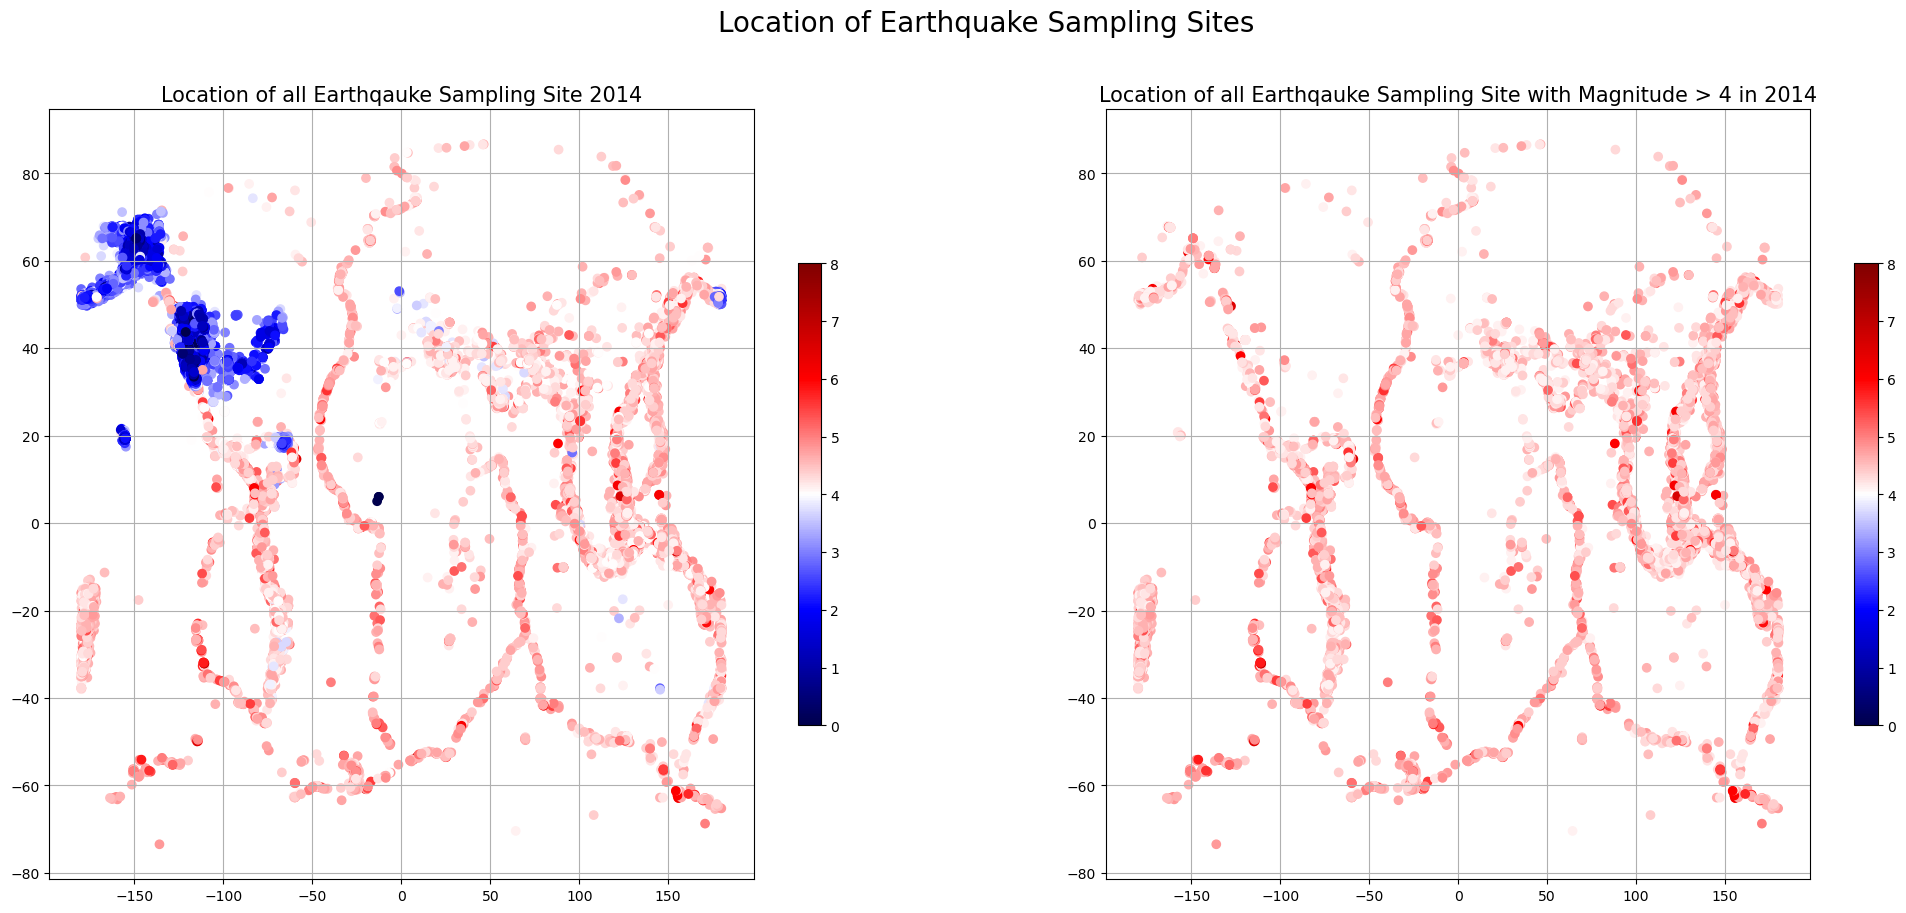

In [43]:
lat = df['latitude'].values
lon = df['longitude'].values
mag =  df['mag'].values
lat2 = mag_4['latitude'].values
lon2 = mag_4['longitude'].values
mag4 = mag_4['mag'].values

#Creating Plots
fig, ax = plt.subplots(ncols = 2, figsize = [25, 10])
fig1 = ax[0].scatter(lon, lat, c = mag, cmap = 'seismic', vmin = 0, vmax = 8)
fig2 = ax[1].scatter(lon2, lat2, c = mag4, cmap = 'seismic', vmin = 0, vmax = 8)
fig.colorbar(fig1, ax=ax[0], shrink=0.6)
fig.colorbar(fig1, ax=ax[1], shrink=0.6)
ax[0].grid()
ax[1].grid()
ax[0].set_title('Location of all Earthqauke Sampling Site in 2014', fontsize = 15)
ax[1].set_title('Location of all Earthqauke Sampling Site with Magnitude < 4 in 2014', fontsize = 15)
fig.suptitle('Location of Earthquake Sampling Sites', fontsize = 20)
plt.show()